In [2]:
disp(version)

9.12.0.1884302 (R2022a)


# Section 1: Loading a single results file

In [3]:
% specify imaging outcome of interest
img_pheno = 'rsi_rni_aseg';
var_interest = 'dmri_rsirni_scs_vdclh';

fname_design = '/space/syn50/1/data/ABCD/d9smith/age/results_2023-12-11/designMat4_BFsSexIncEducHispPCsScanSoftMotion_bly2y4.txt';
fname_basis = '/space/syn50/1/data/ABCD/d9smith/age/basis.txt';

outpath = "/home/d9smith/projects/age/plots/tabulated";                                                    

In [4]:
tbl_design = readtable(fname_design);
% figure; plot(tbl_design.age,tbl_design.bf_demean_1,'*')

Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.


In [5]:
tbl_bf = readtable(fname_basis); agevals_tbl = linspace(100,200,101);
bfmat = table2array(tbl_bf);
[dummy dbfmat] = gradient(bfmat); dbfmat = dbfmat/(agevals_tbl(2)-agevals_tbl(1));
% figure; plot(agevals_tbl,bfmat,'LineWidth',2); 
% figure; plot(agevals_tbl,dbfmat,'LineWidth',2);

In [6]:
results_dir = strrep(fname_design,'.txt','');
load(sprintf('%s/FEMA_wrapper_output_external_mri_y_%s.mat',results_dir,img_pheno));
% char(colnames_imaging)

In [7]:
% Intersect data
vec1 = strcat(iid,eid);
vec2 = strcat(tbl_design.src_subject_id,tbl_design.eventname);
[dummy IA IB] = intersect(vec1,vec2,'stable');
agevec_tbl = tbl_design.age;
agevec = agevec_tbl(IB);

jvec_bf = find(find_cell(regexp(colnames_model,'^bf_','match')));
% figure; plot(agevec,X(:,jvec_bf),'*');

In [8]:
% compute sum of betas for basis functions
valvec = NaN([size(beta_hat,2) length(agevals_tbl)]);
for agei = 1:length(agevals_tbl)
  wvec = dbfmat(agei,:)';
  % wvec = bfmat(agei,:)';
  valvec(:,agei) = sum(beta_hat([jvec_bf],:).*wvec,1);
end

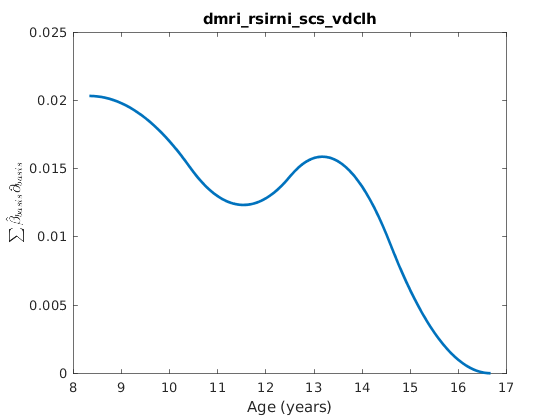

In [9]:
% to plot just one variable
col_interest = find(find_cell(regexp(colnames_imaging,var_interest,'match')));

figure; plot(agevals_tbl/12,valvec(col_interest,:),'LineWidth',2);
title(var_interest, 'Interpreter', 'none');
xlabel('Age (years)');
ylabel('$\sum{\hat{\beta}_{basis}\partial_{basis}}$','Interpreter','latex');

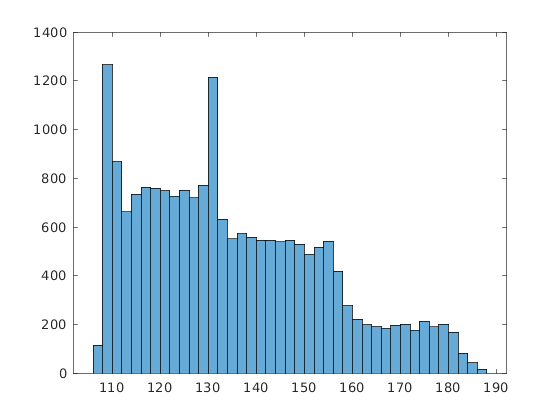

In [10]:
% distribution of ages in the dataset
figure; histogram(tbl_design.age);

## Section 1b: Creating many figures from one results file

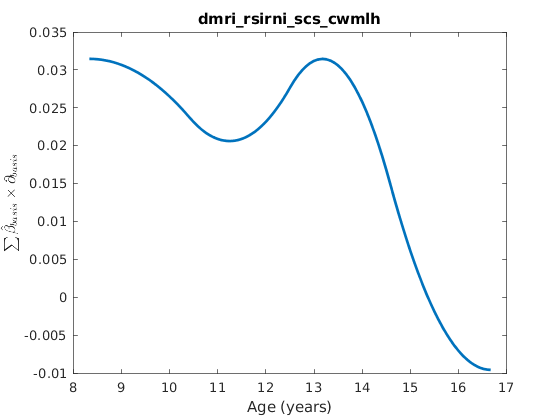

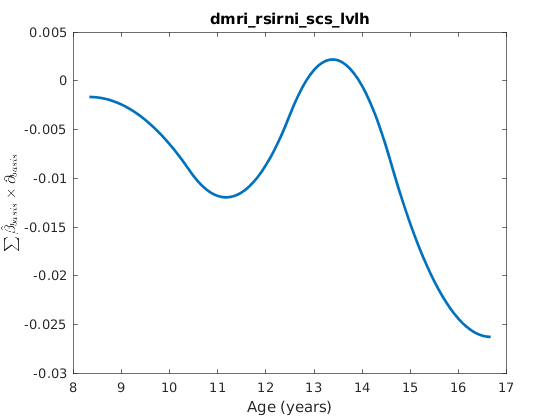

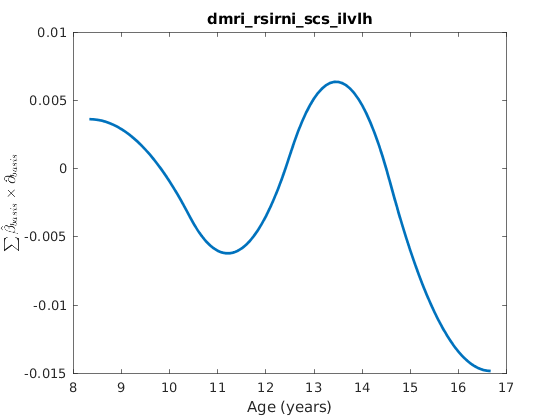

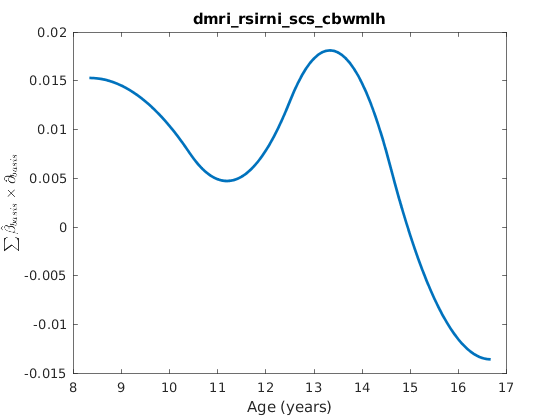

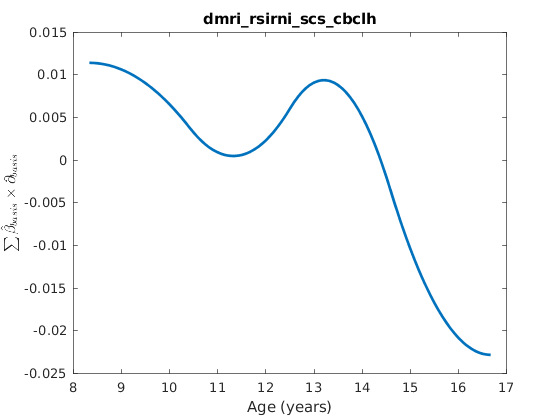

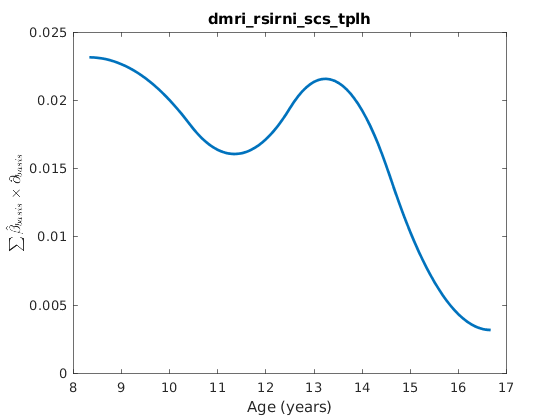

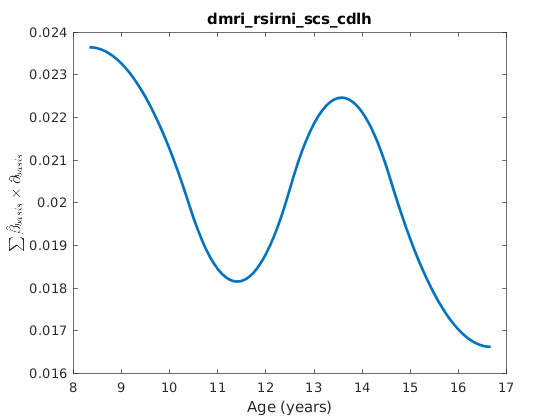

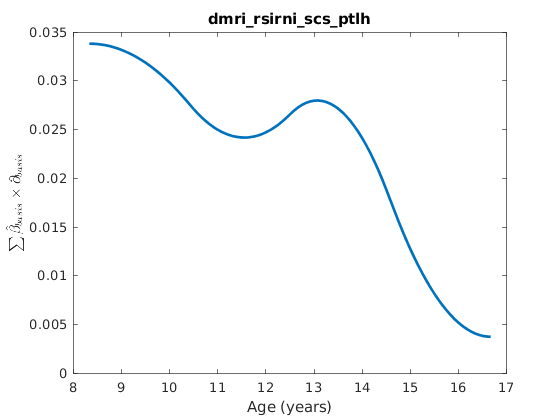

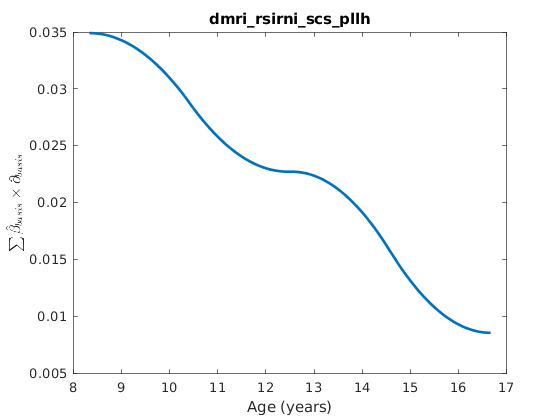

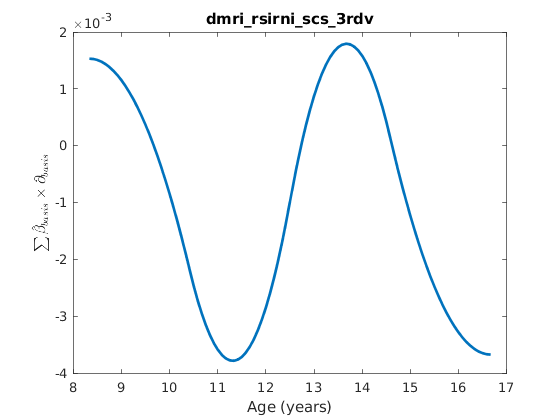

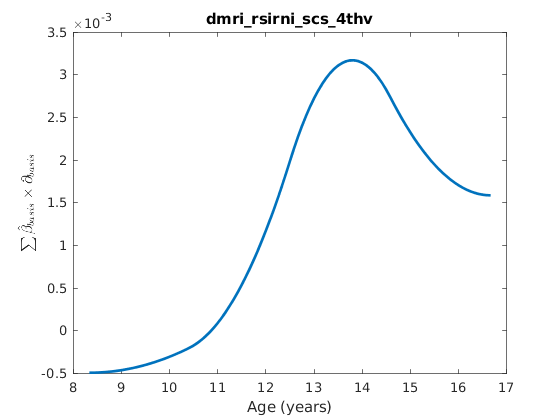

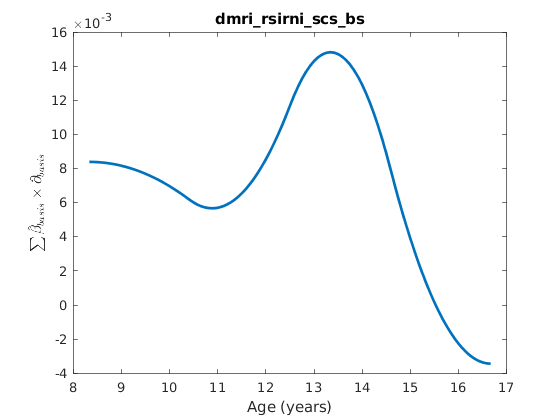

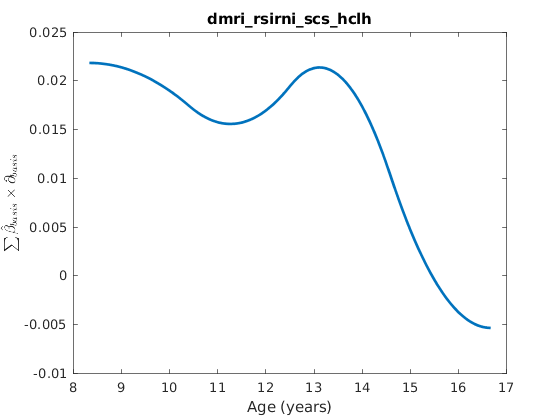

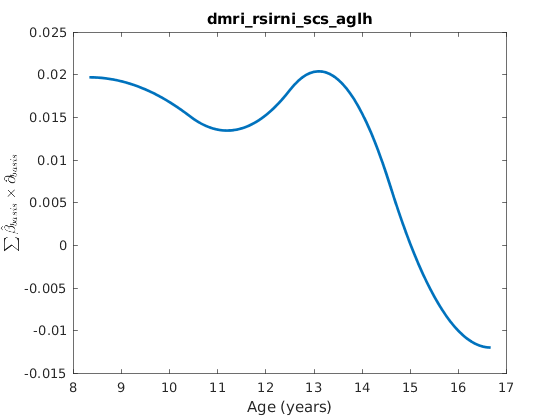

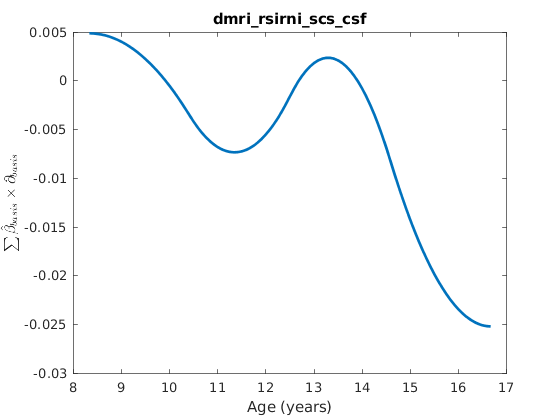

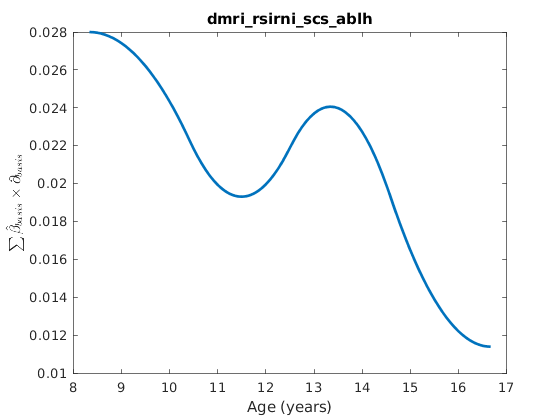

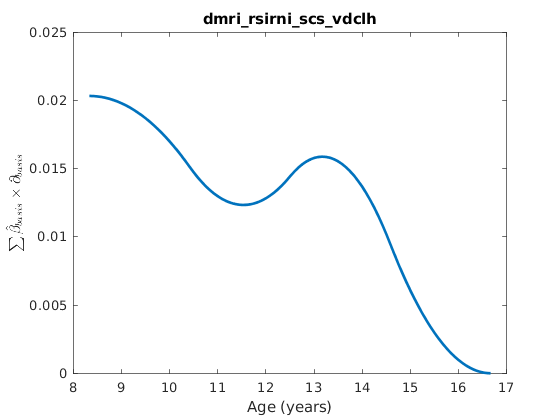

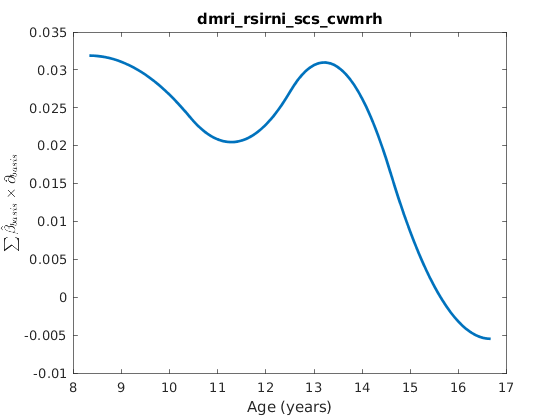

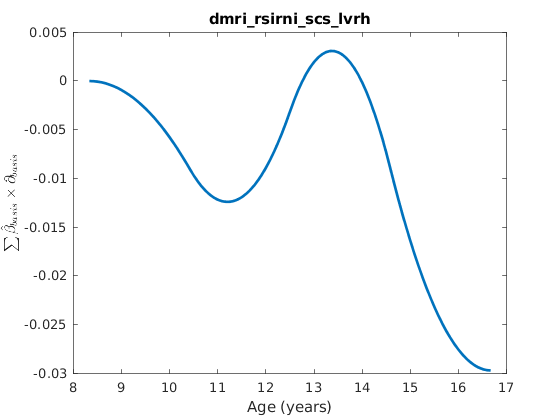

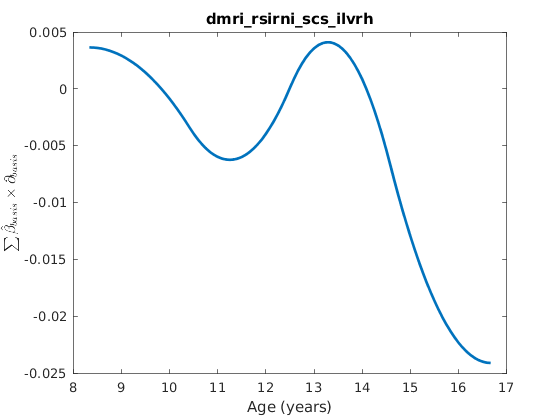

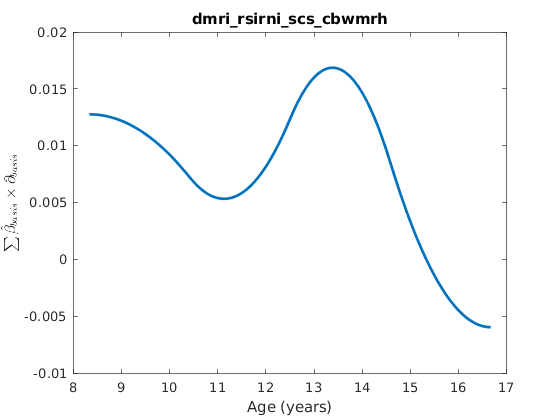

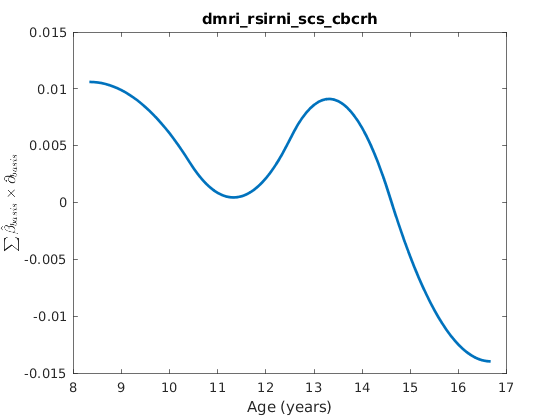

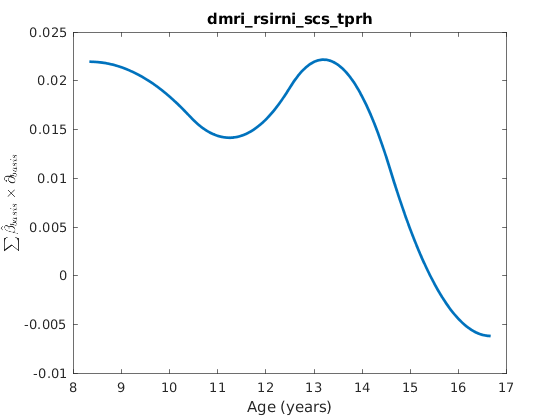

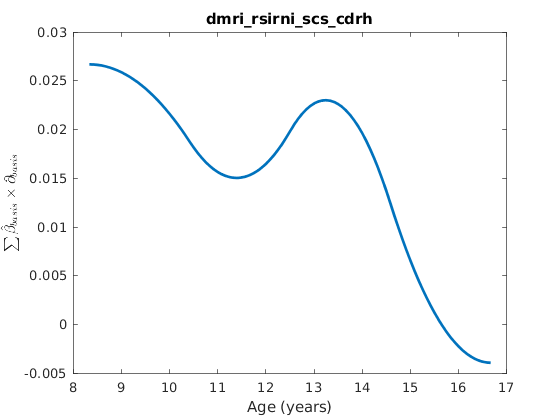

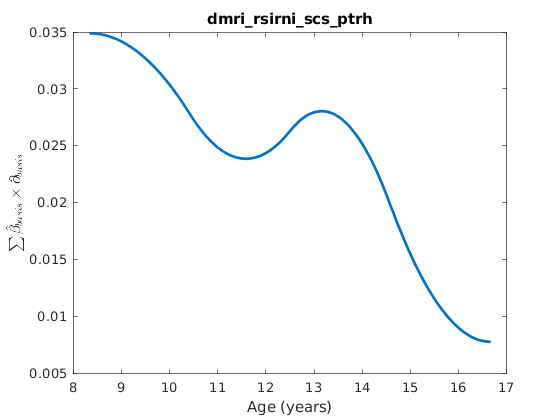

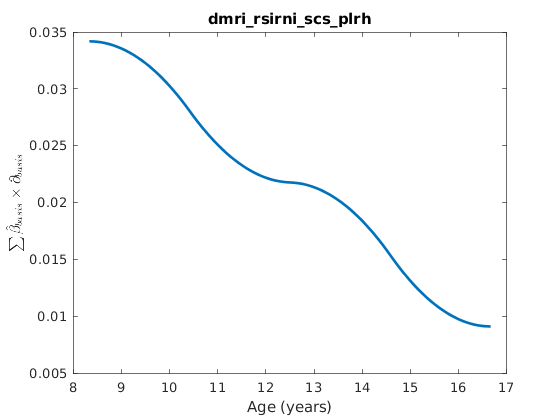

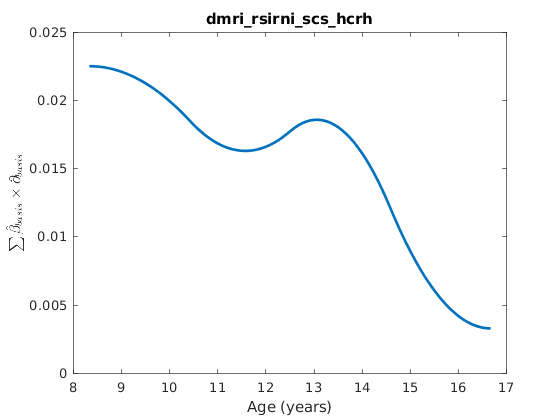

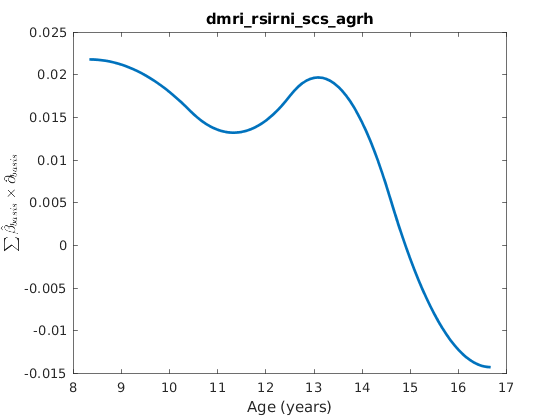

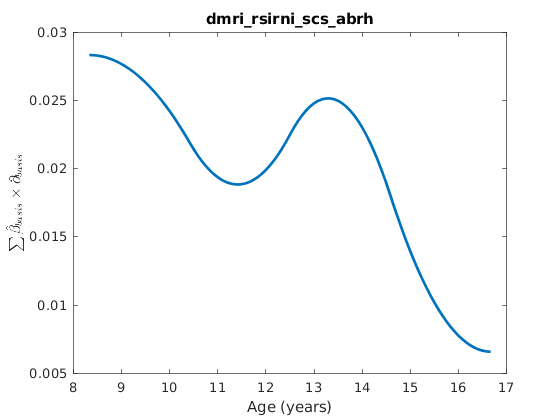

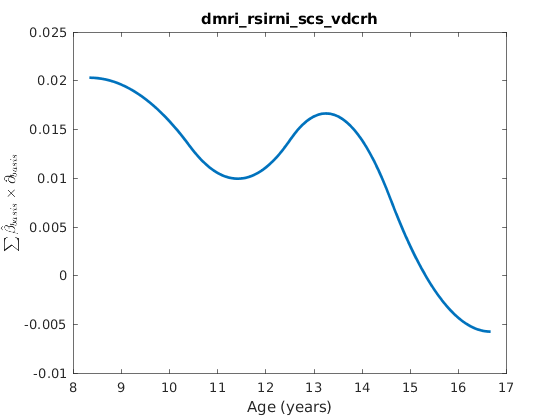

In [11]:
% create many figures
for figi = 1:length(colnames_imaging)
    figure(figi);
    plot(agevals_tbl/12,valvec(figi,:),'LineWidth',2);
    title(colnames_imaging(figi), 'Interpreter', 'none');
    xlabel('Age (years)');
    ylabel('$\sum{\hat{\beta}_{basis}\times\partial_{basis}}$','Interpreter','latex');
end

## Section 2: Saving all figures from all results files

In [12]:
results_file_list = dir(sprintf('%s/FEMA_wrapper_output_external_mri_y_*.mat', results_dir));
results_file = {results_file_list.name}';
% disp(results_file)

In [ ]:
for filei=1:length(results_file)
    load(sprintf('%s/%s',results_dir,results_file{filei}));
    
    % Intersect data
    vec1 = strcat(iid,eid); % from results file
    vec2 = strcat(tbl_design.src_subject_id,tbl_design.eventname);
    [dummy IA IB] = intersect(vec1,vec2,'stable');
    agevec_tbl = tbl_design.age;
    agevec = agevec_tbl(IB);
    
    jvec_bf = find(find_cell(regexp(colnames_model,'^bf_','match')));
    
    % compute sum of betas for basis functions
    valvec = NaN([size(beta_hat,2) length(agevals_tbl)]);
    for agei = 1:length(agevals_tbl)
      wvec = dbfmat(agei,:)';
      % wvec = bfmat(agei,:)';
      valvec(:,agei) = sum(beta_hat([jvec_bf],:).*wvec,1);
    end
    
    % subdirectory to save figures
    filestr=strrep(strrep(results_file{filei},'FEMA_wrapper_output_external_mri_y_',''),'.mat','');
    savedir = sprintf('%s/%s',outpath,filestr);
    if ~exist(savedir, 'dir')
        mkdir(savedir)
    end
    
    % create many figures
    for figi = 1:length(colnames_imaging)
        figure(figi);
        plot(agevals_tbl/12,valvec(figi,:),'LineWidth',2);
        title(colnames_imaging(figi), 'Interpreter', 'none');
        xlabel('Age (years)');
        ylabel('$\sum{\hat{\beta}_{basis}\times\partial_{basis}}$','Interpreter','latex');
        saveas(gcf,sprintf('%s/%s.png',savedir,colnames_imaging{figi}));
    end
end